<a href="https://colab.research.google.com/github/luizrobertofreitas/colab-research-google/blob/master/PortifolioReturnTax2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [0]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
  mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6346 entries, 1995-01-03 to 2020-03-17
Data columns (total 4 columns):
PG      6346 non-null float64
MSFT    6346 non-null float64
F       6346 non-null float64
GE      6346 non-null float64
dtypes: float64(4)
memory usage: 247.9 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.200019,2.729230
1995-01-04,6.311406,2.431082,3.286119,2.729230
1995-01-05,6.222151,2.390982,3.257418,2.735919
1995-01-06,6.234900,2.431082,3.257418,2.722540
1995-01-09,6.209402,2.416045,3.314818,2.695783


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-03-11,111.589996,153.630005,5.90,8.21
2020-03-12,101.839996,139.059998,5.35,7.23
2020-03-13,114.070000,158.830002,5.63,7.85
2020-03-16,108.500000,135.419998,5.01,6.66
2020-03-17,118.239998,146.570007,5.01,7.08


# Normalization to 100

(P1/P0) * 100

In [8]:
mydata.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

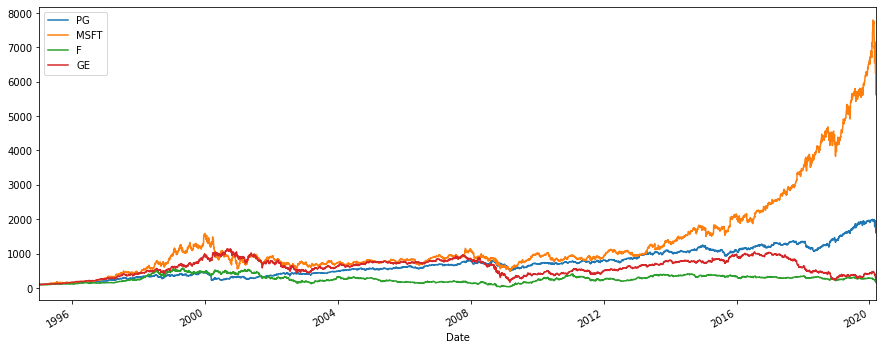

In [9]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

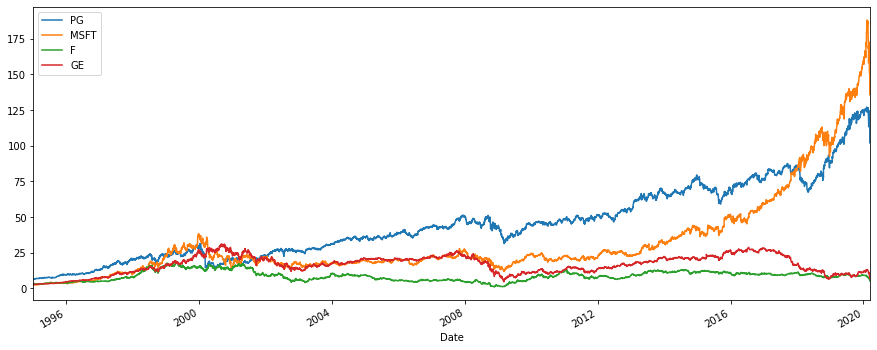

In [10]:
mydata.plot(figsize=(15,6))

In [11]:
mydata.loc['1995-01-03']

PG      6.362402
MSFT    2.413537
F       3.200019
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

# Calculating the return of a portifolio of securities

In [13]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [0]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
np.dot(returns, weights) # multiply returns by weights

array([        nan,  0.00654002, -0.00923   , ...,  0.10008738,
       -0.11448416,  0.05879229])

In [20]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.140611
MSFT    0.211459
F       0.095001
GE      0.085327
dtype: float64

In [22]:
np.dot(annual_returns, weights)

0.13309946266433875

In [26]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

13.309999999999999%


In [0]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [28]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

13.309999999999999%
15.934000000000001%
